In [ ]:
!pip show torch

Name: torch
Version: 2.0.1+cu118
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, jinja2, networkx, sympy, triton, typing-extensions
Required-by: fastai, torchaudio, torchdata, torchtext, torchvision, triton


In [ ]:
!pip install torch==2.0.0+cu117 torchvision==0.15.1+cu117 torchaudio==2.0.1 --index-url https://download.pytorch.org/whl/cu117 #install pytorch

Looking in indexes: https://download.pytorch.org/whl/cu117
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 747.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 102.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 106.3 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1+cu118
    Uninstalling torch-2.0.1+cu118:
      Successfully uninstalled torch-2.0.1+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.2+cu118
    Uninstalling torchvision-0.15.2+cu118:
      Successfully uninstalled torchvision-0.15.2+cu118
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.0.2+cu118
    Uninstalling torchaudio-2.0.2+cu118:
      Successfully uninstalled torchaudio-2.0.2+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dep

In [ ]:
!git clone https://github.com/ultralytics/yolov5 #import yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15927, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 15927 (delta 20), reused 26 (delta 9), pack-reused 15880
Receiving objects: 100% (15927/15927), 14.60 MiB | 24.75 MiB/s, done.
Resolving deltas: 100% (10919/10919), done.


In [ ]:
!cd yolov5 && pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.1 MB/s eta 0:00:00


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-8-29 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


please select which one do want to help to detect - 
 1).Video 
 2).Camera 
 3).Images 
 select your option: 3
please enter the location of the image: /content/eagle.jpg


image 1/1: 512x773 1 bird
Speed: 15.5ms pre-process, 286.4ms inference, 3.0ms NMS per image at shape (1, 3, 448, 640)


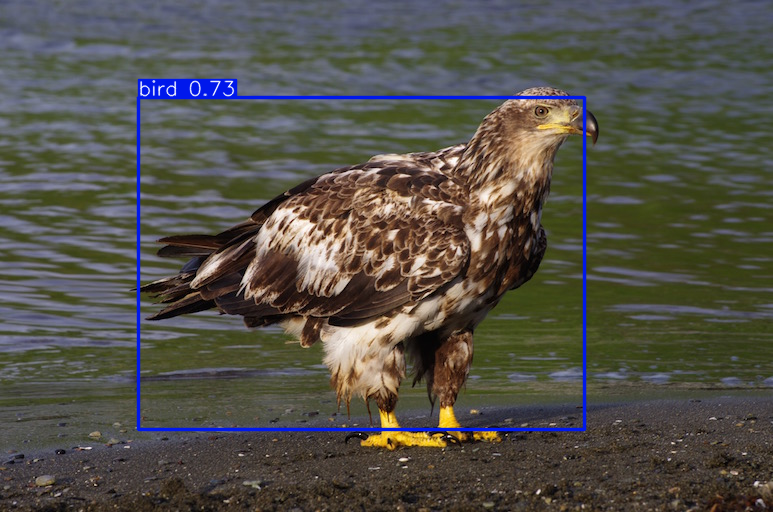

In [7]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Model
model = torch.hub.load("ultralytics/yolov5", "custom",path = "/content/drive/MyDrive/Colab Notebooks/yolov5/runs/train/exp5/weights/best.pt", force_reload = True) # or yolov5n - yolov5x6, custom
select = input("please select which one do want to help to detect - \n 1).Video \n 2).Camera \n 3).Images \n select your option: ")
if select == '1' or select.lower() == 'video':
    vid = input("please enter the location of the video: ")
    Video(vid)
elif select == '2' or select.lower() == 'camera':
    Camera()
elif select == '3' or select.lower() == 'images':
    img = input(r'please enter the location of the image: ')
    Image(img)
else:
    print('please write the select the correct option.....')



def Video(vid):
    cap = cv2.VideoCapture(vid)
    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            results = model(frame)

            cv2_imshow(np.squeeze(results.render()))
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        else:
            break
    cap.release()
    cv2.destroyAllWindows()


def Camera():
    cap = cv2.VideoCapture(0)
    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            results = model(frame)

            cv2_imshow('YOLO', np.squeeze(results.render()))

            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    cap.release()
    cv2.destroyAllWindows()


def Image(img):
    results = model(img)
    results.print()
    results.show()


In [ ]:
!git clone https://github.com/tzutalin/labelImg #helps to label the images

Cloning into 'labelImg'...


In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
!cd yolov5 && python train.py --img 640 --batch 8 --epochs 70 --data coco128.yaml --weights yolov5s.pt --cache --nosave #trained our own custom dataset

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=70, batch_size=8, imgsz=640, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-212-g9974d51 Python-3.10.12 torch-2.0.0+cu117 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, de

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
!zip yolov5.zip Colab Notebooks/

	zip warning: name not matched: Colab
	zip warning: name not matched: Notebooks/

zip error: Nothing to do! (yolov5.zip)


In [ ]:
!unzip data.zip